In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc


In [2]:
df = pd.read_csv("yazılım_kelimeler.csv")
df['kelime'] = df['kelime'].str.strip().str.lower()
df['etiket'] = 1

# yazılım dışı terimler için bu kodun devamı yapılacak!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#geliştirilecek
negatif = pd.read_csv("negatif_kelimelerson.csv")
negatif['kelime'] = negatif['kelime'].str.strip().str.lower()
negatif['etiket'] = 0

veri = pd.concat([df, negatif], ignore_index=True)
veri.sample(5)


,kelime,aciklama,etiket
2284,üzüntü,NaN,0
1187,api (uygulama programlama arayüzü),Uygulamalar arasında veri alışverişini sağlay...,1
3503,kar,NaN,0
3639,kuş,NaN,0
3826,borç,NaN,0


In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(veri['kelime'])
sequences = tokenizer.texts_to_sequences(veri['kelime'])
X = pad_sequences(sequences, maxlen=1)
y = veri['etiket'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
import time

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=16)
end_time = time.time()

Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6225 - loss: 0.6814 - val_accuracy: 0.8520 - val_loss: 0.5486
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9660 - loss: 0.3755 - val_accuracy: 0.8827 - val_loss: 0.2415
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9918 - loss: 0.0618 - val_accuracy: 0.8763 - val_loss: 0.2097
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9957 - loss: 0.0242 - val_accuracy: 0.8814 - val_loss: 0.2057
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9932 - loss: 0.0193 - val_accuracy: 0.8763 - val_loss: 0.2066
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9958 - loss: 0.0137 - val_accuracy: 0.8814 - val_loss: 0.2050
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9936 - loss: 0.0151 - val_accuracy: 0.8801 - val_loss: 0.2049
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9944 - loss: 0.0144 - val_accuracy: 0.

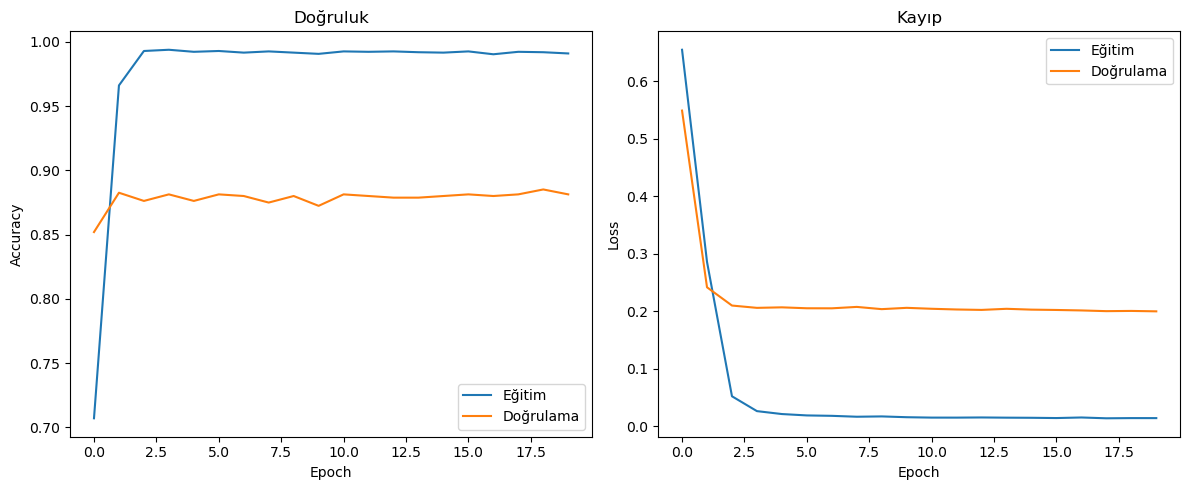

Eğitim süresi: 8.77 saniye


In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim')
plt.plot(history.history['val_accuracy'], label='Doğrulama')
plt.title('Doğruluk')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim')
plt.plot(history.history['val_loss'], label='Doğrulama')
plt.title('Kayıp')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Eğitim süresi: {(end_time - start_time):.2f} saniye")


In [6]:
model.save("text_model.h5")

with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)


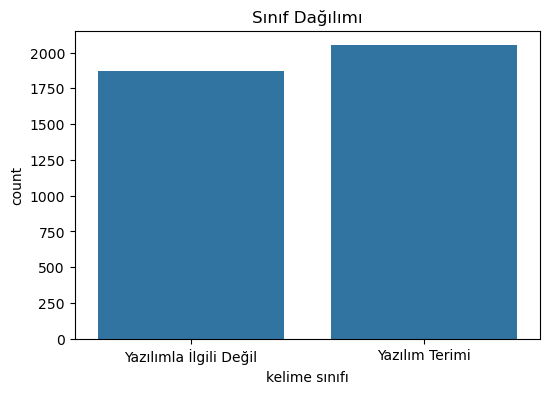

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x=veri['etiket'])
plt.xticks([0,1], ['Yazılımla İlgili Değil', 'Yazılım Terimi'])
plt.xlabel('kelime sınıfı')
plt.title("Sınıf Dağılımı")
plt.show()


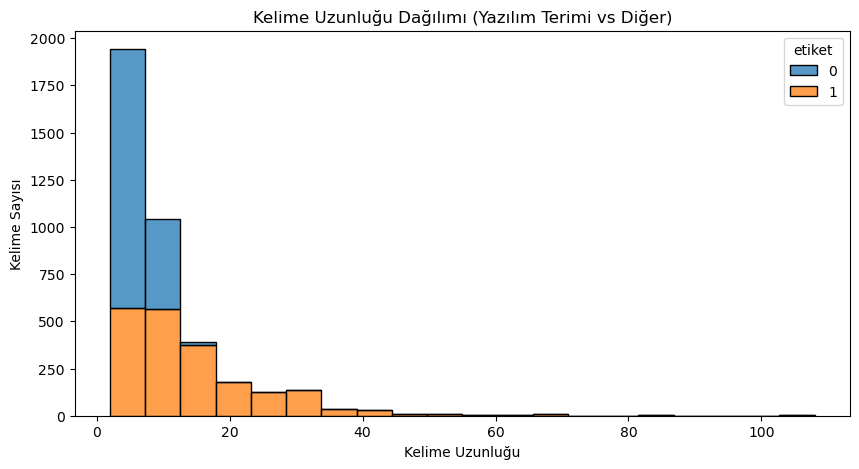

In [8]:
veri['kelime_uzunlugu'] = veri['kelime'].apply(len)

plt.figure(figsize=(10,5))
sns.histplot(data=veri, x='kelime_uzunlugu', hue='etiket', multiple='stack', bins=20)
plt.title("Kelime Uzunluğu Dağılımı (Yazılım Terimi vs Diğer)")
plt.xlabel("Kelime Uzunluğu")
plt.ylabel("Kelime Sayısı")
plt.show()


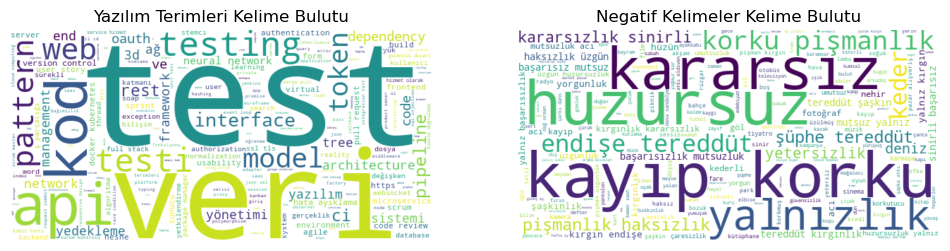

In [9]:
from wordcloud import WordCloud

pozitif_kelimeler = " ".join(veri[veri['etiket'] == 1]['kelime'])
negatif_kelimeler = " ".join(veri[veri['etiket'] == 0]['kelime'])

wordcloud_pozitif = WordCloud(width=600, height=300, background_color='white').generate(pozitif_kelimeler)
wordcloud_negatif = WordCloud(width=600, height=300, background_color='white').generate(negatif_kelimeler)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(wordcloud_pozitif, interpolation='bilinear')
plt.axis('off')
plt.title('Yazılım Terimleri Kelime Bulutu')

plt.subplot(1,2,2)
plt.imshow(wordcloud_negatif, interpolation='bilinear')
plt.axis('off')
plt.title('Negatif Kelimeler Kelime Bulutu')

plt.show()
